## Part One: Data cleaning

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import imblearn
from imblearn.over_sampling import RandomOverSampler

import random
from sklearn.ensemble import RandomForestClassifier





In [3]:
# Read the dataset
df_red = pd.read_csv('winequality-red.csv')
#df_red = pd.read_csv('winequality-red.csv', sep = ';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check null values
df_red.isnull().values.any()
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Check duplicated rows
df_red[df_red.duplicated(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'], keep = 'first')]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
df_red.duplicated(keep='first').head(50)
df_red.duplicated(keep='first').value_counts()

False    1359
True      240
dtype: int64

## Part Two: Exploratory Data Analysis

In [7]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Feature frequency plots')

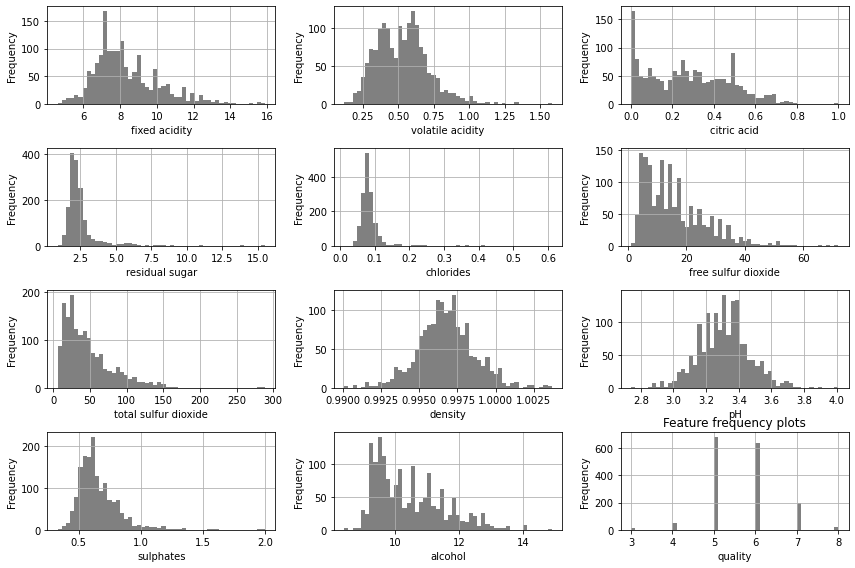

In [8]:
# Feature plots for each single feature
columns = df_red.columns.to_list()
plt.figure(figsize = (12, 8))

for i in range(len(columns)):
    plt.subplot(4, 3, i+1)
    df_red[columns[i]].hist(bins = 50, facecolor='gray')
    plt.xlabel(columns[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.title('Feature frequency plots')

<AxesSubplot:title={'center':'Correlation heat map'}>

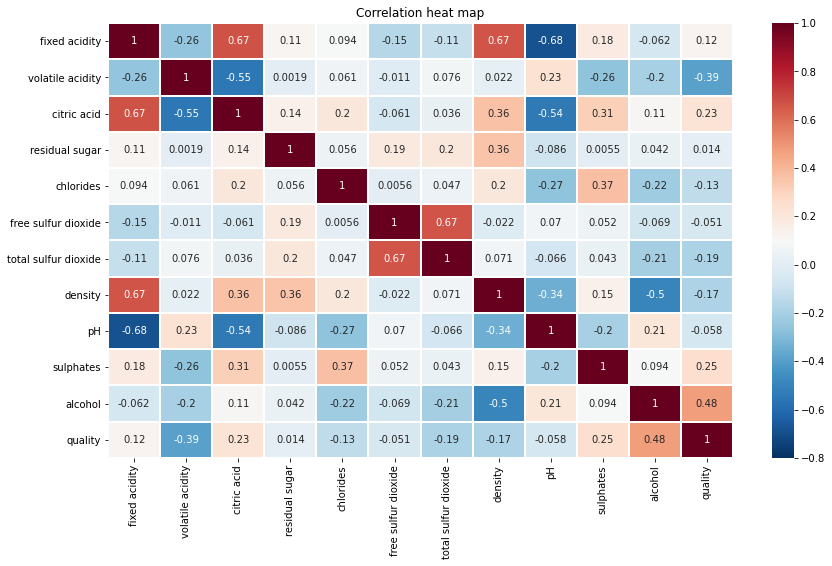

In [9]:
# Correlation heat map
plt.figure(figsize=(14, 8))
plt.title('Correlation heat map')
sns.heatmap(df_red.corr(), annot=True, linewidths=1, vmin=-0.8, cmap="RdBu_r")

In [10]:
df_red.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<ipython-input-11-0e6420f22c84>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 3, i+1)
<ipython-input-11-0e6420f22c84>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 3, i+1)
<ipython-input-11-0e6420f22c84>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created a

Physicochemical Properties and Wine Quality by Boxplot


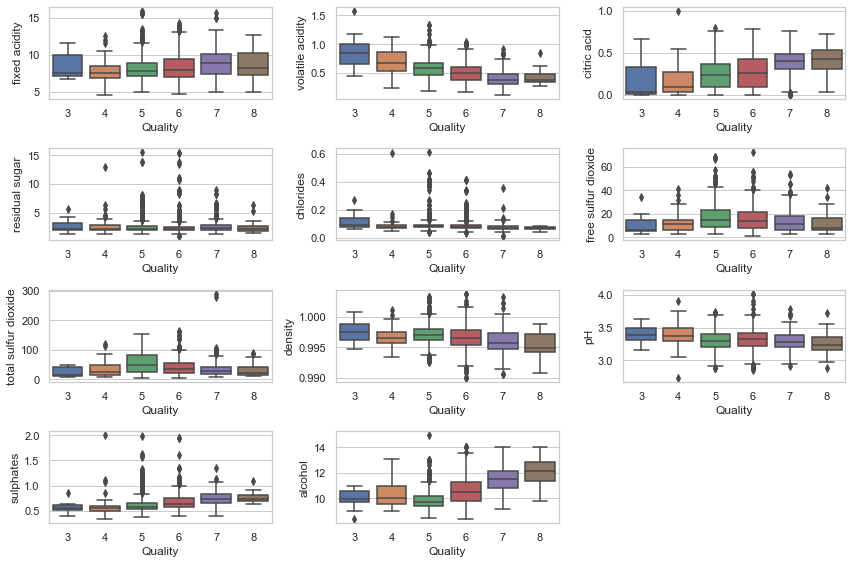

In [11]:
plt.figure(figsize=(12, 8))
column = df_red.columns.tolist()
sns.set(style='whitegrid')
for i in range(11):
    ax = plt.subplot(4, 3, i+1)
    sns.boxplot(x="quality", y=column[i], data=df_red)
    plt.xlabel('Quality')
    plt.ylabel(column[i])
    plt.subplot(4, 3, i+1)

plt.tight_layout()
print("Physicochemical Properties and Wine Quality by Boxplot")

Text(0.5, 1.0, 'Scatter plots for the top 3 correlated features')

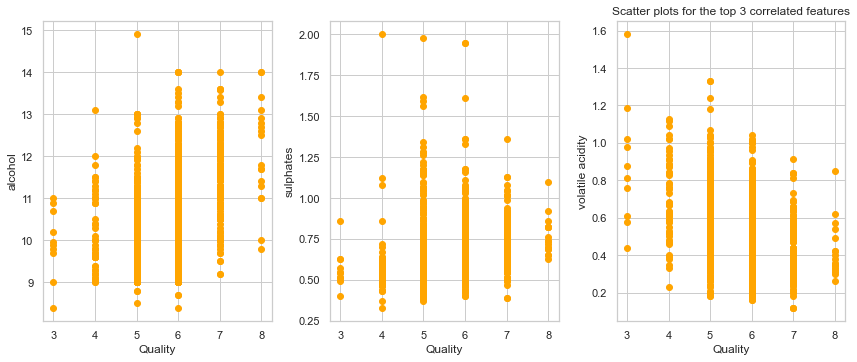

In [12]:
# Scatter plots for the top 3 correlated features
most_correlated_features = ['alcohol', 'sulphates','volatile acidity']

plt.figure(figsize=(12, 5))
for i in range(len(most_correlated_features)):
    plt.subplot(1, 3, i+1)
    plt.scatter(df_red['quality'], df_red[most_correlated_features[i]], color = 'orange')
    plt.xlabel('Quality')
    plt.ylabel(most_correlated_features[i])
plt.tight_layout()
plt.title('Scatter plots for the top 3 correlated features')

In [13]:
# https://github.com/vikrantkakad/Red-Wine-Quality-Analysis/blob/master/Capstone_Vikrant.Kakad.ipynb

## Part three: Balance our dataset

In [14]:
# Train test split
X = df_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df_red['quality']

tr_X, te_X, tr_Y, te_Y = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [15]:
# Check data balance
print(tr_Y.value_counts())

5    502
6    490
7    146
4     42
8     11
3      8
Name: quality, dtype: int64


In [16]:
# Balance the training data
# Import library
import imblearn
from imblearn.over_sampling import RandomOverSampler

# X = df_red.iloc[:,:-1].values
# y = df_red['quality'].values
ros = RandomOverSampler()
tr_X, tr_Y = ros.fit_resample(tr_X, tr_Y)
print(pd.DataFrame(tr_Y).value_counts().sort_index())

quality
3          502
4          502
5          502
6          502
7          502
8          502
dtype: int64


In [17]:
df = pd.DataFrame(tr_X, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
df['quality'] = tr_Y
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.5,0.45,0.50,3.0,0.078,19.0,47.0,1.00030,3.26,1.11,11.0,6
1,9.3,0.49,0.36,1.7,0.081,3.0,14.0,0.99702,3.27,0.78,10.9,6
2,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.6,7
3,6.2,0.46,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5
4,11.9,0.43,0.66,3.1,0.109,10.0,23.0,1.00000,3.15,0.85,10.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3007,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
3008,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
3009,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
3010,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


class 3: (502, 12)
class 4: (502, 12)
class 5: (502, 12)
class 6: (502, 12)
class 7: (502, 12)
class 8: (502, 12)


<AxesSubplot:xlabel='quality', ylabel='count'>

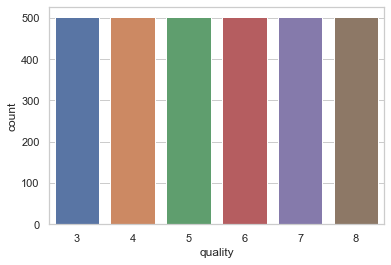

In [18]:
class_3 = df[df['quality'] == 3]
class_4 = df[df['quality'] == 4]
class_5 = df[df['quality'] == 5]
class_6 = df[df['quality'] == 6]
class_7 = df[df['quality'] == 7]
class_8 = df[df['quality'] == 8]
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)

sns.countplot(x='quality', data=df)

In [19]:
data = pd.read_csv('winequality-red.csv')
#data = pd.read_csv('winequality-red.csv', sep = ';')

# Method1:Random Forest 

### Train-Test Split

In [20]:
X = data.drop("quality",axis=1)
y = data.loc[:,"quality"]

In [21]:
tr_X, te_X, tr_Y, te_Y = train_test_split(X, y, test_size = 0.25, random_state = 5)

### Rebalance

In [22]:
ros = RandomOverSampler()
tr_X, tr_Y = ros.fit_resample(tr_X, tr_Y)
print(pd.DataFrame(tr_Y).value_counts().sort_index())

quality
3          502
4          502
5          502
6          502
7          502
8          502
dtype: int64


### Cross Validation with GridSearch

In [23]:
## Define a Random Forest Model
RF_model = RandomForestClassifier()

## Define parameter grid for the CV to search 
param_grid = {'n_estimators': list(range(10,300,20)),'max_depth' : list(range(4,20,1))
              ,'max_features' : ["sqrt","log2"]}

random.seed(472448)

CV_model = GridSearchCV(RF_model, param_grid)

## Train the model for grid search CV
CV_model.fit(tr_X, tr_Y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150,
                                          170, 190, 210, 230, 250, 270, 290]})

In [24]:
print("Best hyperparameters: ",CV_model.best_params_)

Best hyperparameters:  {'max_depth': 19, 'max_features': 'sqrt', 'n_estimators': 190}


In [25]:
score = CV_model.cv_results_['mean_test_score']
depth = CV_model.cv_results_['param_max_depth']
n_est = CV_model.cv_results_['param_n_estimators']
n_feat = CV_model.cv_results_['param_max_features']

cv_result = pd.DataFrame(np.stack([score,depth,n_est,n_feat],axis=1),columns=['score','depth','n_est','feature'])
cv_result.score = pd.to_numeric(cv_result.score)
cv_result.depth = pd.to_numeric(cv_result.depth)
cv_result.n_est = pd.to_numeric(cv_result.n_est)

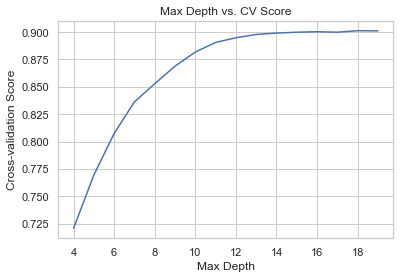

In [26]:
plt.plot(cv_result.groupby(['depth'])['score'].mean().index,cv_result.groupby(['depth'])['score'].mean().values)
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Score')
plt.title('Max Depth vs. CV Score')
plt.show;

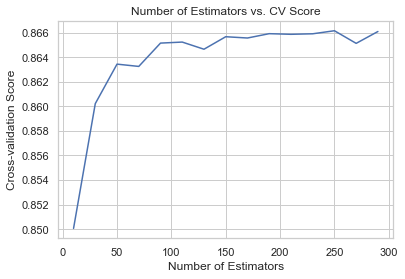

In [27]:
plt.plot(cv_result.groupby(['n_est'])['score'].mean().index,cv_result.groupby(['n_est'])['score'].mean().values)
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-validation Score')
plt.title('Number of Estimators vs. CV Score')
plt.show;

In [28]:
cv_result.groupby(['feature'])['score'].mean()

feature
log2    0.863944
sqrt    0.863822
Name: score, dtype: float64

### Test Result

In [29]:
## Define the model with best hyperparameters based on the CV
best_model = RandomForestClassifier(max_depth = 17, n_estimators = 150, bootstrap = True, max_features = 'sqrt')

## Train the model
best_model.fit(tr_X, tr_Y)

random.seed(472448)

## Get the prediction
prediction = best_model.predict(te_X)

In [30]:
cm = confusion_matrix(te_Y,prediction)
print(cm)

[[  0   0   2   0   0   0]
 [  1   0   4   6   0   0]
 [  0   3 150  26   0   0]
 [  0   0  36 105   7   0]
 [  0   0   5  19  29   0]
 [  0   0   0   3   3   1]]


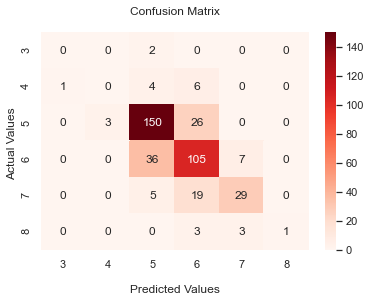

In [31]:
ax = sns.heatmap(cm, annot=True, cmap = "Reds",fmt='d')
ax.set_title("Confusion Matrix\n");
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['3','4','5','6','7','8'])
ax.yaxis.set_ticklabels(['3','4','5','6','7','8'])

plt.show()

In [32]:
creport = classification_report(te_Y, prediction);
print(creport)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.84      0.80       179
           6       0.66      0.71      0.68       148
           7       0.74      0.55      0.63        53
           8       1.00      0.14      0.25         7

    accuracy                           0.71       400
   macro avg       0.53      0.37      0.39       400
weighted avg       0.70      0.71      0.70       400



In [33]:
np.mean(te_Y == prediction)

0.7125

# Method2:ANN(Artificial neural network)

In [34]:
# Read the dataset
df_red = pd.read_csv('winequality-red.csv')
#df_red = pd.read_csv('winequality-red.csv', sep = ';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Train-Test Split

In [35]:
X_red = df_red.iloc[:,:-1]
Y_red = df_red.iloc[:,-1]

In [36]:
tr_X, te_X, tr_Y, te_Y = train_test_split(X_red, Y_red, test_size=0.25, random_state=5)

## Rebalance

In [37]:
tr_X=tr_X.values
tr_Y=tr_Y.values

ros = RandomOverSampler() #Construct oversampling method
X,y = ros.fit_resample(tr_X, tr_Y)
print(pd.DataFrame(y)[0].value_counts().sort_index())

3    502
4    502
5    502
6    502
7    502
8    502
Name: 0, dtype: int64


### Validation with GridSearch

In [38]:
GRID = [
    {'scaler': [StandardScaler()],
     'estimator': [MLPClassifier(random_state=5)],
     'estimator__solver': ['sgd'],
     'estimator__learning_rate_init': [0.1],
     'estimator__max_iter': [1000],
     'estimator__hidden_layer_sizes': [(400, 400, 400, 400, 400), (300, 300, 300, 300, 300), (200, 200, 200, 200, 200),(100,100,100,100,100)],
     'estimator__activation': ['relu'],
     'estimator__alpha': [0.1],
     'estimator__early_stopping': [True, False]
     }
]

PIPELINE = Pipeline([('scaler',None), ('estimator', MLPClassifier())])
grid_search = GridSearchCV(estimator=PIPELINE, param_grid=GRID, 
                            #scoring=make_scorer(accuracy_score),# average='macro'), 
                            n_jobs=-1, refit=True, verbose=1, 
                            return_train_score=False)

grid_search.fit(tr_X, tr_Y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator', MLPClassifier())]),
             n_jobs=-1,
             param_grid=[{'estimator': [MLPClassifier(alpha=0.1,
                                                      hidden_layer_sizes=(300,
                                                                          300,
                                                                          300,
                                                                          300,
                                                                          300),
                                                      learning_rate_init=0.1,
                                                      max_iter=1000,
                                                      random_state=5,
                                                      solver='sgd')],
                          'estimator__activation': ['relu'],
                          'estimator_

In [39]:
grid_search.best_params_

{'estimator': MLPClassifier(alpha=0.1, hidden_layer_sizes=(300, 300, 300, 300, 300),
               learning_rate_init=0.1, max_iter=1000, random_state=5,
               solver='sgd'),
 'estimator__activation': 'relu',
 'estimator__alpha': 0.1,
 'estimator__early_stopping': False,
 'estimator__hidden_layer_sizes': (300, 300, 300, 300, 300),
 'estimator__learning_rate_init': 0.1,
 'estimator__max_iter': 1000,
 'estimator__solver': 'sgd',
 'scaler': StandardScaler()}

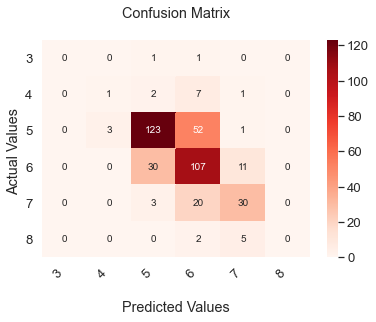

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.09      0.13        11
           5       0.77      0.69      0.73       179
           6       0.57      0.72      0.64       148
           7       0.62      0.57      0.59        53
           8       0.00      0.00      0.00         7

    accuracy                           0.65       400
   macro avg       0.37      0.34      0.35       400
weighted avg       0.65      0.65      0.64       400



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
y_pred = grid_search.predict(te_X)

cm = confusion_matrix(te_Y, y_pred)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.2) # for label size

result=sns.heatmap(df_cm,annot=True,annot_kws={"size": 10}, cmap = "Reds",fmt='d')
result.set_title("Confusion Matrix\n");
result.set_xlabel('\nPredicted Values')
result.set_ylabel('Actual Values ')
label_y = result.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = result.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
result.xaxis.set_ticklabels(['3','4','5','6','7','8'])
result.yaxis.set_ticklabels(['3','4','5','6','7','8'])
plt.show()
clas = classification_report(te_Y, y_pred)
print(clas)